In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import os
from tqdm.notebook import tqdm

In [2]:
def make_graph(l, inv_ks,vlen=100):
    vn = np.einsum('i,j->ij', inv_ks, np.arange(vlen)**2)
    graph = py_gauge_mc.GPUGaugeTheory(l,l,l,l,vn.astype(np.float32))
    return graph

In [3]:
inv_ks = np.linspace(0.1,1.0,64)

In [4]:
graph = make_graph(8, inv_ks)
w_v = graph.simulate_and_get_winding_variance(100,local_updates_per_step=10,steps_per_sample=10)

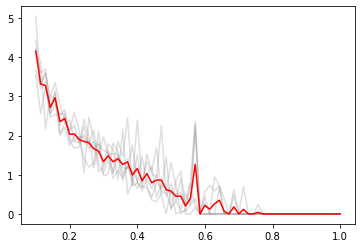

In [5]:
for i in range(w_v.shape[-1]):
    plt.plot(inv_ks, w_v[:,i], c='gray', alpha=0.25)

plt.plot(inv_ks, w_v.mean(axis=-1), c='red')

In [6]:
graph = make_graph(8, inv_ks)
w_v_par = graph.simulate_and_get_winding_variance(100,local_updates_per_step=10,steps_per_sample=10,run_parallel_tempering=True)

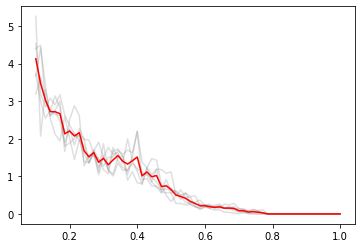

In [7]:
for i in range(w_v_par.shape[-1]):
    plt.plot(inv_ks, w_v_par[:,i], c='gray', alpha=0.25)

plt.plot(inv_ks, w_v_par.mean(axis=-1), c='red')

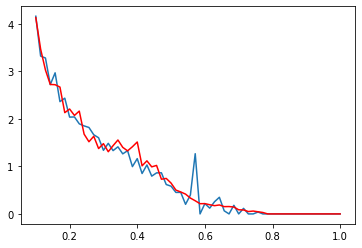

In [9]:
plt.plot(inv_ks, w_v.mean(axis=-1))
plt.plot(inv_ks, w_v_par.mean(axis=-1), c='red')

In [8]:
graph.get_parallel_tempering_success_rate()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002,
 0.002,
 0.002,
 0.01,
 0.018,
 0.008,
 0.022,
 0.022,
 0.044,
 0.05,
 0.052,
 0.038,
 0.06,
 0.052,
 0.074,
 0.092,
 0.078,
 0.076,
 0.118,
 0.106,
 0.104,
 0.1,
 0.116,
 0.132,
 0.134,
 0.128,
 0.152,
 0.164,
 0.172,
 0.164,
 0.176,
 0.15,
 0.168,
 0.142,
 0.21,
 0.194,
 0.12,
 0.144,
 0.16,
 0.14,
 0.098,
 0.068,
 0.0,
 0.022,
 0.052,
 0.064,
 0.09,
 0.136,
 0.174,
 0.224,
 0.264,
 0.272,
 0.356,
 0.38,
 0.384,
 0.414,
 0.45,
 0.494]